# Mercedes-Benz: EDA
#By- Aarush Kumar
#Dated: July 29,2021

In [1]:
from IPython.display import Image
Image(url='https://images.hdqwalls.com/wallpapers/mercedes-amg-gtr-4k-2021-q7.jpg')

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
from subprocess import check_output

In [4]:
df_train = pd.read_csv("/home/aarush100616/Downloads/Projects/Mercedes-Benz EDA/train.csv.zip")
df_test = pd.read_csv("/home/aarush100616/Downloads/Projects/Mercedes-Benz EDA/test.csv.zip")

In [5]:
df_train

ID       y  X0 X1  X2 X3 X4  X5 X6 X8  X10  X11  X12  X13  X14  X15  \
0        0  130.81   k  v  at  a  d   u  j  o    0    0    0    1    0    0   
1        6   88.53   k  t  av  e  d   y  l  o    0    0    0    0    0    0   
2        7   76.26  az  w   n  c  d   x  j  x    0    0    0    0    0    0   
3        9   80.62  az  t   n  f  d   x  l  e    0    0    0    0    0    0   
4       13   78.02  az  v   n  f  d   h  d  n    0    0    0    0    0    0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...  ...  ...  ...  ...  ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q    0    0    0    0    1    0   
4205  8406  108.77   j  o   t  d  d  aa  h  h    0    0    0    0    0    0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e    0    0    1    1    0    0   
4207  8415   87.48  al  r   e  f  d  aa  l  u    0    0    0    0    1    0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w    0    0    0    0    0    0   

      X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  \
0       0    0    1    0    0    1    0    0    0    0    0    0    0    0   
1       0    0    1    0    0    0    0    0    0    0    1    0    0    0   
2       0    1    0    0    0    0    0    0    0    0    1    1    1    0   
3       0    0    0    0    0    0    0    0    0    0    1    1    1    0   
4       0    0    0    0    0    0    0    0    0    0    1    1    1    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
4205    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4206    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
4207    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4208    0    0    0    0    1    0    0    0    0    0    0    0    0    0   

      X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  \
0       1    0    0    0    1    0    1    0    0    0    0    0    0    0   
1       1    0    0    0    1    0    1    0    0    0    0    0    0    0   
2       1    0    0    0    1    0    1    0    0    0    0    0    1    0   
3       1    0    0    0    1    0    1    0    0    0    0    0    1    0   
4       1    0    0    0    1    0    1    0    0    0    0    0    1    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
4205    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4206    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4207    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
4208    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  \
0       0    1    0    0    0    0    0    0    0    0    0    0    0    1   
1       0    0    0    0    0    0    1    0    0    0    0    0    0    0   
2       0    1    0    0    0    0    1    0    0    1    0    0    0    1   
3       0    1    0    0    0    0    0    0    0    1    0    0    0    0   
4       0    1    0    0    0    0    1    0    0    1    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204    0    0    0    0    1    1    1    0    0    0    0    0    0    1   
4205    0    0    0    0    0    0    1    0    1    0    0    0    0    0   
4206    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4207    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4208    0    1    0    0    0    0    1    0    0    0    0    0    0    1   

      X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  \
0       0    0    0    0    0    0    0    0    0    1    0    1    0    0   
1       0    0    1    0    0    0    0    0    0    0    0    1    0    0   
2       0    0

In [6]:
df_test

ID  X0  X1  X2 X3 X4  X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0        1  az   v   n  f  d   t  a  w    0    0    0    0    0    0    0   
1        2   t   b  ai  a  d   b  g  y    0    0    0    0    0    0    0   
2        3  az   v  as  f  d   a  j  j    0    0    0    0    1    0    0   
3        4  az   l   n  f  d   z  l  n    0    0    0    0    0    0    0   
4        5   w   s  as  c  d   y  i  m    0    0    0    0    1    0    0   
...    ...  ..  ..  .. .. ..  .. .. ..  ...  ...  ...  ...  ...  ...  ...   
4204  8410  aj   h  as  f  d  aa  j  e    0    0    0    0    1    0    0   
4205  8411   t  aa  ai  d  d  aa  j  y    0    0    0    0    0    0    0   
4206  8413   y   v  as  f  d  aa  d  w    0    0    0    0    1    0    0   
4207  8414  ak   v  as  a  d  aa  c  q    0    0    0    1    1    0    0   
4208  8416   t  aa  ai  c  d  aa  g  r    0    0    0    0    0    0    0   

      X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  \
0       0    0    0    0    0    0    0    0    0    1    1    1    0    1   
1       0    0    1    0    0    0    0    0    0    1    0    0    0    1   
2       0    0    0    0    0    0    0    0    0    1    0    1    0    1   
3       0    0    0    0    0    0    0    0    0    1    1    1    0    1   
4       0    0    0    0    0    0    0    0    0    1    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
4205    0    0    1    0    0    0    0    0    0    1    0    0    0    1   
4206    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
4207    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
4208    0    0    1    0    0    0    0    0    0    1    0    0    0    1   

      X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  \
0       0    0    0    1    0    1    0    0    0    0    0    1    0    0   
1       0    0    0    1    0    1    0    0    0    0    0    0    0    1   
2       0    0    0    1    0    1    0    0    0    0    0    0    0    0   
3       0    0    0    1    0    1    0    0    0    0    0    1    0    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4205    0    0    0    1    0    1    0    0    0    0    0    0    0    0   
4206    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4207    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4208    0    0    0    1    0    1    0    0    0    0    0    0    0    0   

      X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  \
0       1    0    0    0    0    0    0    0    1    0    0    0    0    0   
1       1    0    0    1    1    1    0    0    0    0    0    0    1    0   
2       0    0    0    0    0    1    0    0    1    0    0    0    1    0   
3       1    0    0    0    0    0    0    0    1    0    0    0    0    0   
4       0    0    0    0    0    1    0    0    0    0    0    0    1    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4205    1    0    0    1    1    0    0    0    0    0    0    0    1    0   
4206    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
4207    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4208    1    0    0    1    1    1    0    0    0    0    0    0    1    0   

      X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  \
0       0    1    0    0    0    0    0    0    0    0    1    0    0    1   
1       0    1    0    0    0    0    0    0    0    0    1    0    0    1   
2       0    1    0    0    0    0    

In [7]:
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


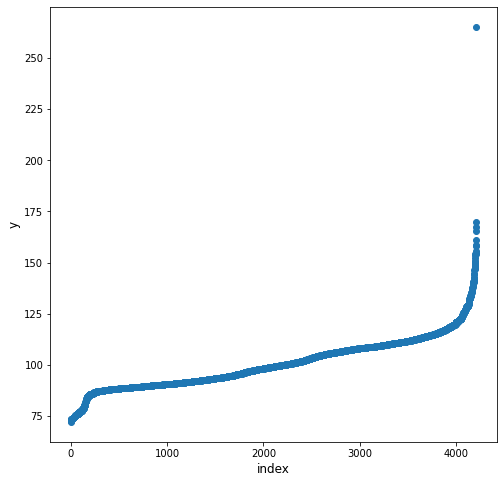

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(range(df_train.shape[0]),np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


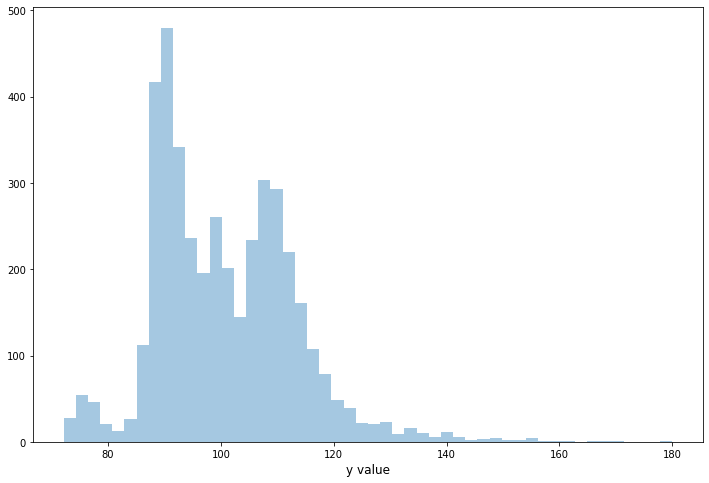

In [9]:
ulimit = 180
df_train['y'].iloc[df_train['y']>ulimit] = ulimit
plt.figure(figsize=(12,8))
sns.distplot(df_train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [10]:
dtype_data=df_train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64    369
1     float64      1
2      object      8

In [11]:
dtype_data.loc[:10,:]

Count Column Type
0     ID       int64
1      y     float64
2     X0      object
3     X1      object
4     X2      object
5     X3      object
6     X4      object
7     X5      object
8     X6      object
9     X8      object
10   X10       int64

In [12]:
df_train.isnull().sum().sum()

0

In [13]:
# Integer Columns Analysis
unique_value_dict = {}
for col in df_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

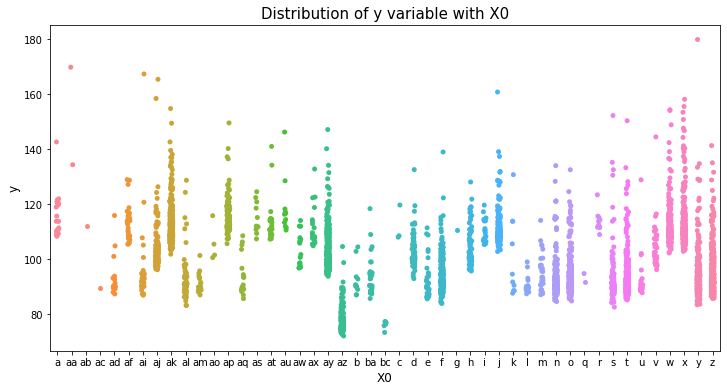

In [14]:
# Now let us explore the categorical columns present in the dataset.
var="X0"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

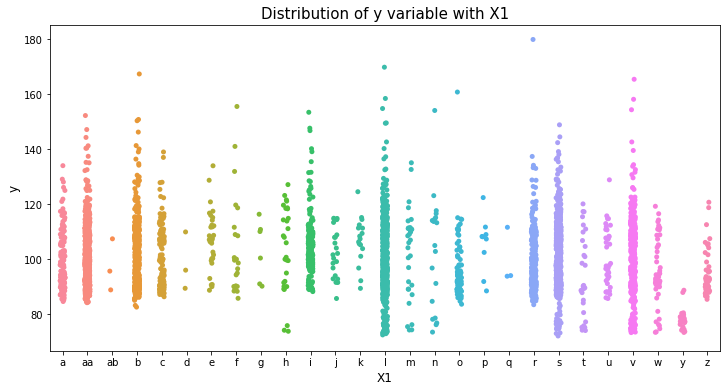

In [15]:
var="X1"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

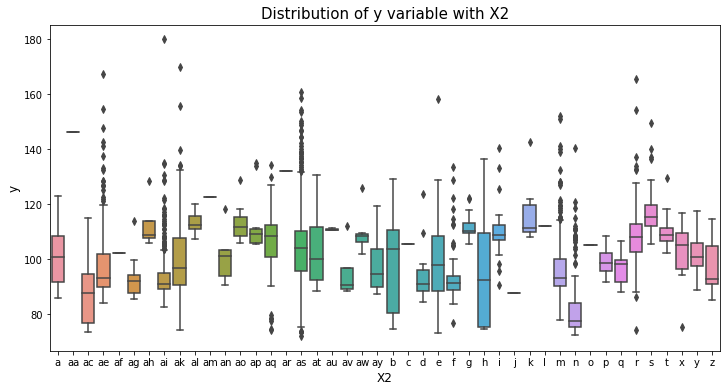

In [16]:
var="X2"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

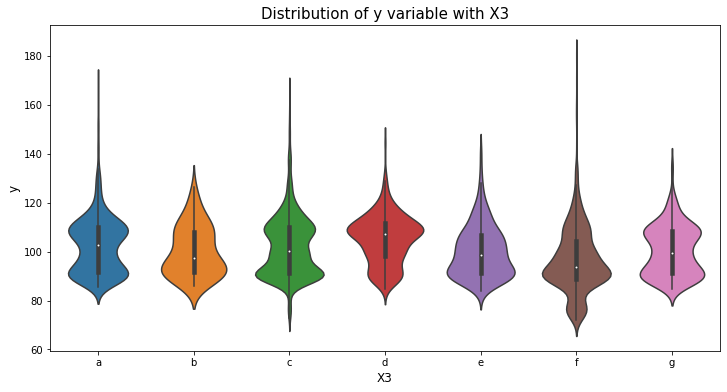

In [17]:
var="X3"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

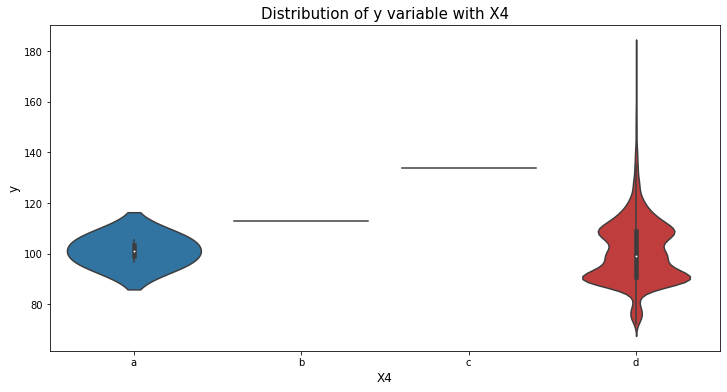

In [18]:
var="X4"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

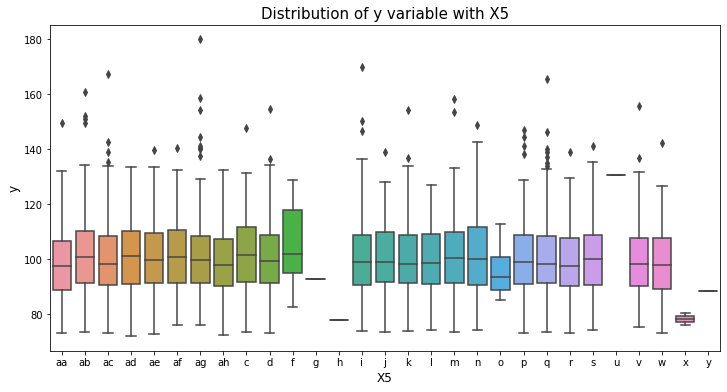

In [19]:
var="X5"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

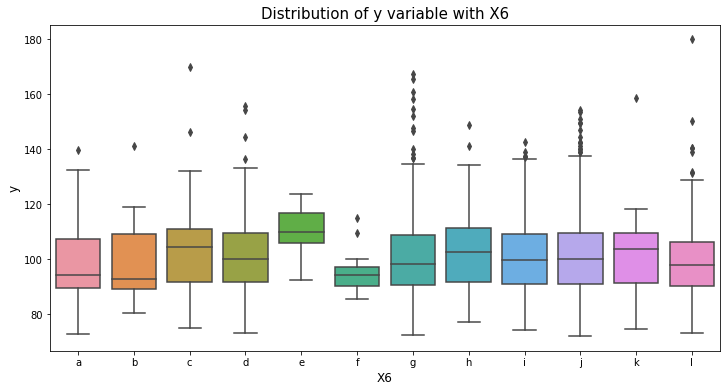

In [20]:
var="X6"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

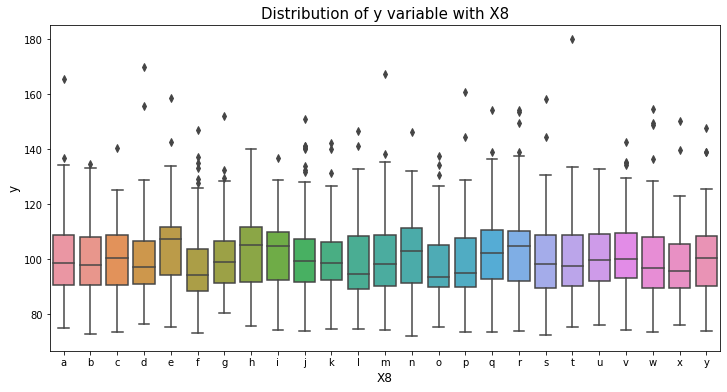

In [23]:
var="X8"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

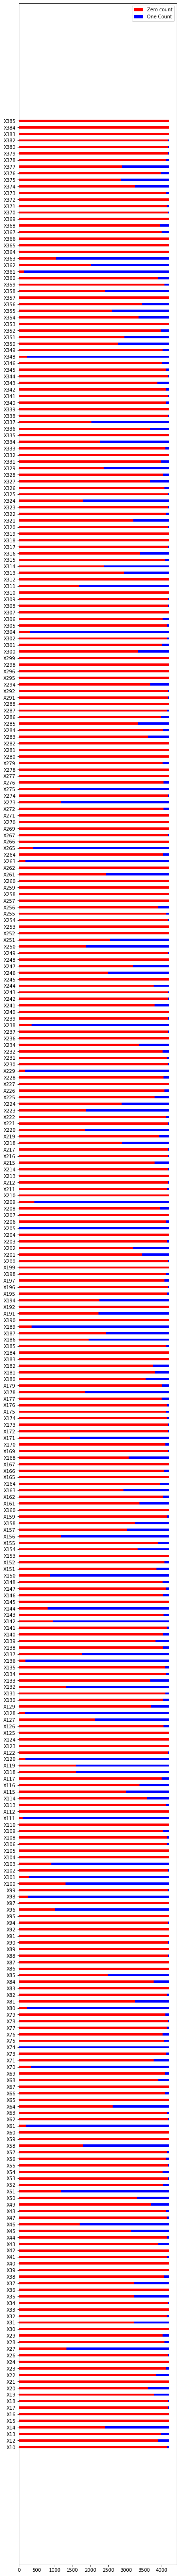

In [24]:
zero_list=[]
one_list=[]
col_list = unique_value_dict['[0, 1]']
for col in col_list:
    zero_list.append((df_train[col]==0).sum())
    one_list.append((df_train[col]==1).sum())
l = len(col_list)
arr = np.arange(l)
width = 0.35
plt.figure(figsize=(6,100))
plot_1 = plt.barh(arr, zero_list, width, color='red')
plot_2 = plt.barh(arr, one_list, width, left=zero_list, color="blue")
plt.yticks(arr, col_list)
plt.legend((plot_1[0], plot_2[0]), ('Zero count', 'One Count'))
plt.show()

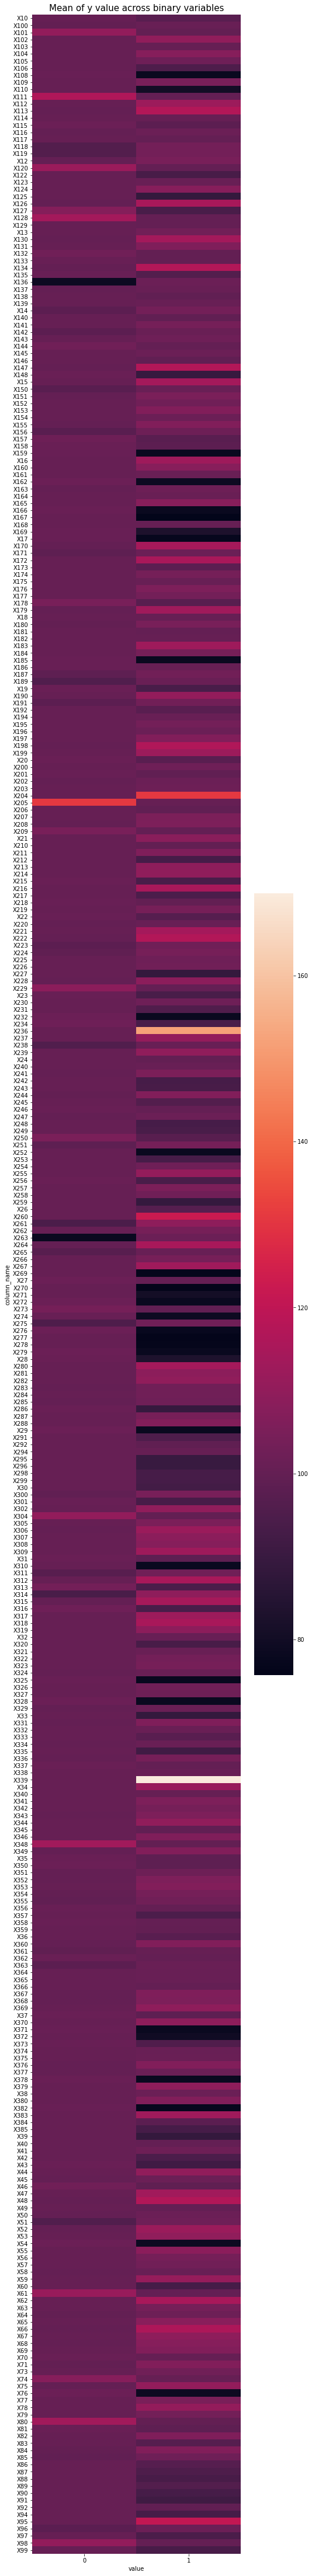

In [25]:
zero_mean_list = []
one_mean_list = []
cols_list = unique_value_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(df_train.loc[df_train[col]==0].y.mean())
    one_mean_list.append(df_train.loc[df_train[col]==1].y.mean())
new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

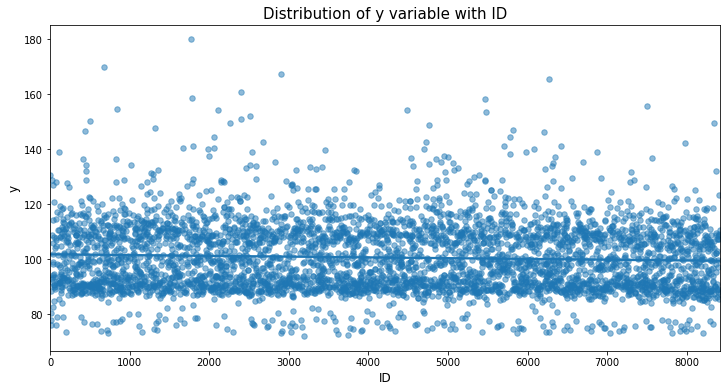

In [26]:
var = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var, y='y', data=df_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

[15:43:33] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:33] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




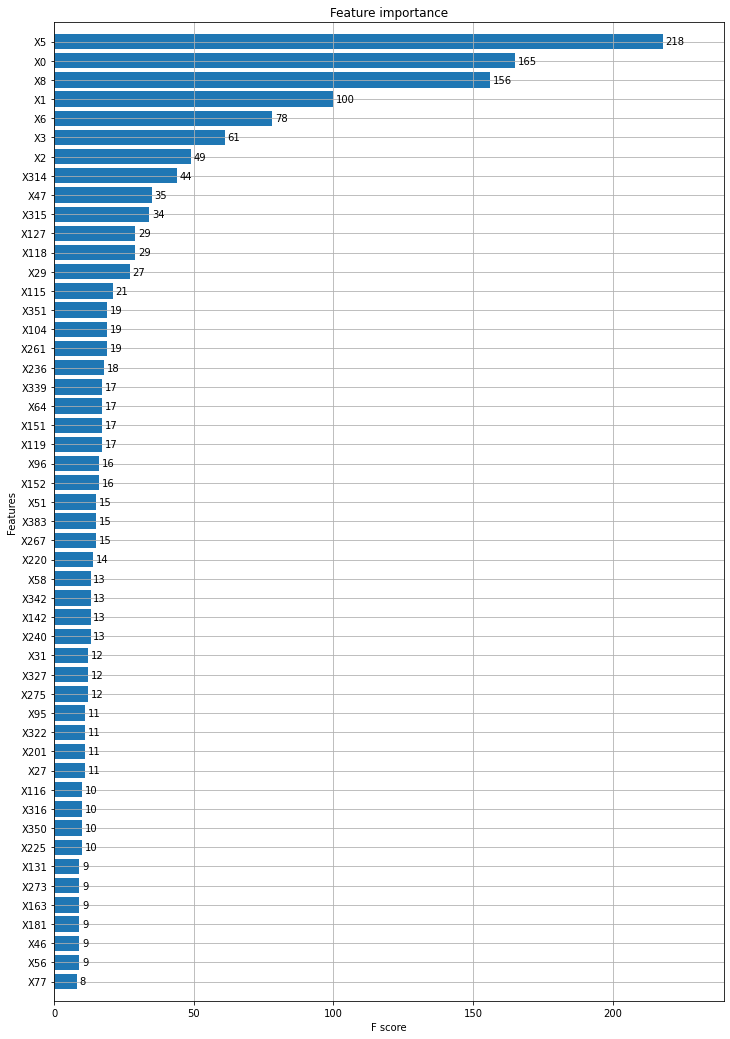

In [27]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[f].values)) 
        df_train[f] = lbl.transform(list(df_train[f].values))
        
train_y = df_train['y'].values
train_X =df_train.drop(["ID", "y"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Let's build a Random Forest model and check the important variables. 

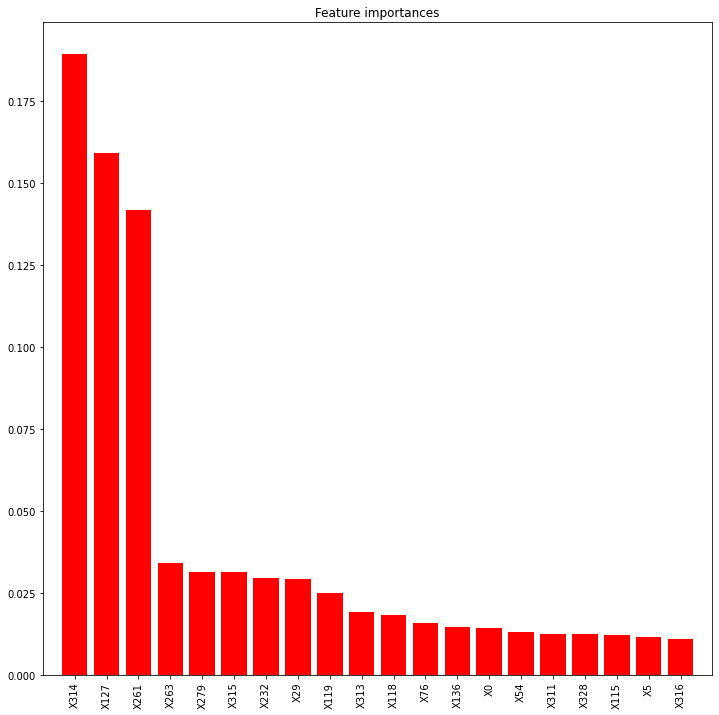

In [29]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values
## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()